(1, 3)

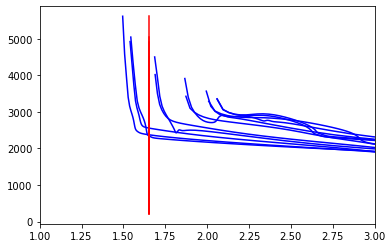

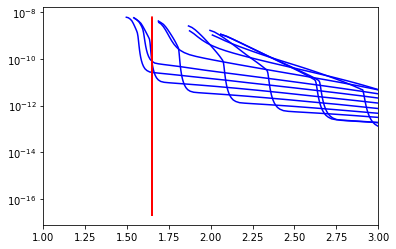

In [23]:
# Read darwin-dat-files
#
# extract 
# Radius, Density, and T_gas - columns
# all are in cgs
#
import matplotlib.pyplot as plt

c5d_star_r_au = 1.651
AUcm = 1.49598e13


modelname = 'M2n315u6'
steplist = [
    '230561',
    '230671',
    '230721',
    '230791',
    '230871',
    '231001',
    '231121',
    '231191',
    '231251',
    '231321',
    '231521'
]



for stepnumber in steplist:

    path = f'../darwin_data/{modelname}_sel/model.{stepnumber}.dat'

    radius_cm = []
    radius_au = []
    gas_density = []
    gas_temperature = []


    with open(path, 'r') as f:
        for nn,line in enumerate(f.readlines()):
            if nn > 18:

                line_list = line.strip().split('  ')

                radius_cm.append(float(line_list[0]))
                radius_au.append(float(line_list[0])/AUcm)
                gas_density.append(float(line_list[1]))
                gas_temperature.append(float(line_list[2]))


    plt.figure(1)
    plt.plot(radius_au,gas_temperature,'b')
    plt.plot(
        [c5d_star_r_au,c5d_star_r_au],
        [min(gas_temperature),max(gas_temperature)],'r'
    )


    plt.figure(2)
    plt.plot(radius_au,gas_density,'b')
    plt.plot(
        [c5d_star_r_au,c5d_star_r_au],
        [min(gas_density),max(gas_density)],'r'
    )
    plt.yscale('log')

plt.figure(1)
plt.xlim(1,3)
plt.figure(2)
plt.xlim(1,3)



Så, hur göra?

1. definiera stjärnan

 * först leta upp vilka data som faktiskt går innanför c5d-stjärnan?
  - eller ska jag försöka normalisera om stjärnan till en sån?
  - samma sak med temperaturen dåju

 * eller ta en medelstjärna av alla data? och sen normalisera om den till en som uppfyller samma storlek o temperatur som co5boldstjärnan?

2. stuva in det i r3d-gridet
 * dvs, sfäriska koordinater, översätta densiteter, temperaturer till data för varje gridcell
 * allt som är inom stjärnan kan ju sättas till konstant densitet o temperatur
 * och så ska radien inte gå utanför co5bold-kuben. Dvs jag inför nog gas-fördelning hela vägen? eller ska jag bara ha gasfördelning upp till en viss radie ovanför stjärnans yta o sen gå över till co5boldgas?
  - med tanke på att med pnktkällorna har jag ingen gas alls, bara stoft så tror jag på det förnämnda mer

/tmp/ipykernel_22478/4264834762.py:116: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


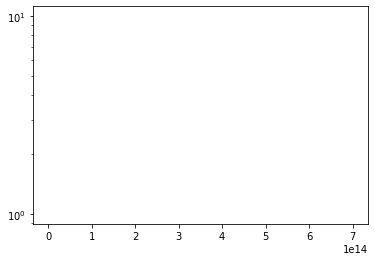

In [36]:
# Test to make an average darwin-star
#
# extract 
# Radius, Density, and T_gas - columns
# all are in cgs
#
import matplotlib.pyplot as plt
import numpy as np

import analyze_r3d_functions as a3d

c5d_star_r_au = 1.651
AUcm = 1.49598e13


modelname = 'M2n315u6'
steplist = [
    '230561',
    '230671',
    '230721',
    '230791',
    '230871',
    '231001',
    '231121',
    '231191',
    '231251',
    '231321',
    '231521'
]

# Load all Darwin data
Ntimesteps = len(steplist)
Ncells = []
all_radii = []
all_density = []
all_temperature = []

for stepnumber in steplist:

    path = f'../darwin_data/{modelname}_sel/model.{stepnumber}.dat'

    path = f'../darwin_data/{modelname}_sel/model.{stepnumber}.dat'

    radius_cm = []
    radius_au = []
    gas_density = []
    gas_temperature = []


    with open(path, 'r') as f:
        for nn,line in enumerate(f.readlines()):
            if nn > 18:

                line_list = line.strip().split('  ')

                radius_cm.append(float(line_list[0]))
                gas_density.append(float(line_list[1]))
                gas_temperature.append(float(line_list[2]))

    # Save and reverse the radial direction
    Ncells.append(len(radius_cm))
    all_radii.append(radius_cm[::-1])
    all_density.append(gas_density[::-1])
    all_temperature.append(gas_temperature[::-1])





# Define grid to average into
Naverage = max(Ncells)
average_radius = np.linspace(
    min(min(all_radii)),
    max(max(all_radii)),
    Naverage
)
average_gas_density = np.zeros(Naverage)
averate_gas_T = np.zeros(Naverage)
average_cell_counter = np.zeros(Naverage)


# Loop over each models radius and densities
for nstep in range(Ntimesteps):

    # Loop over all data in each time step
    for nn in range(Ncells[nstep]):
        
        # Check where these data are closest to average_radius
        for nr in range(Naverage - 1):
            if all_radii[nstep][nn] >= average_radius[nr] and all_radii[nstep][nn] < average_radius[nr]:

                # TODO
                # THIS DOESNT WORK!

                # test with np.where instead?

                average_gas_density[nr] += all_density[nstep][nn]
                averate_gas_T[nr] += all_temperature[nstep][nn]

                average_cell_counter[nr] += 1



# Average the data
average_gas_density /= average_cell_counter
averate_gas_T /= average_cell_counter

plt.figure(1)
plt.plot(
    average_radius,
    average_gas_density,
    'b'
)
plt.plot(
    [c5d_star_r_au,c5d_star_r_au],
    [average_gas_density.min(),average_gas_density.max()],'r'
)
plt.yscale('log')


In [38]:
#print(average_cell_counter)
#print(average_gas_density)
print(average_radius/AUcm)
print(np.array(all_radii[0])/AUcm)

[ 1.49563296  1.96261281  2.42959265  2.89657249  3.36355233  3.83053218
  4.29751202  4.76449186  5.2314717   5.69845155  6.16543139  6.63241123
  7.09939108  7.56637092  8.03335076  8.5003306   8.96731045  9.43429029
  9.90127013 10.36824998 10.83522982 11.30220966 11.7691895  12.23616935
 12.70314919 13.17012903 13.63710887 14.10408872 14.57106856 15.0380484
 15.50502825 15.97200809 16.43898793 16.90596777 17.37294762 17.83992746
 18.3069073  18.77388714 19.24086699 19.70784683 20.17482667 20.64180652
 21.10878636 21.5757662  22.04274604 22.50972589 22.97670573 23.44368557
 23.91066541 24.37764526 24.8446251  25.31160494 25.77858479 26.24556463
 26.71254447 27.17952431 27.64650416 28.113484   28.58046384 29.04744369
 29.51442353 29.98140337 30.44838321 30.91536306 31.3823429  31.84932274
 32.31630258 32.78328243 33.25026227 33.71724211 34.18422196 34.6512018
 35.11818164 35.58516148 36.05214133 36.51912117 36.98610101 37.45308085
 37.9200607  38.38704054 38.85402038 39.32100023 39.7

In [2]:
import analyze_r3d_functions as a3d


# Define grid to average into
#
# needs list of griddistances and cell sizes!

r3d_griddistances = a3d.load_griddistances(
    gridpath='../r3dresults/st28gm06n056/grid_distances.csv',
    amrpath='../r3dresults/st28gm06n056/amr_grid.inp',
)
r3d_radius = r3d_griddistances[:,0]

r3d_cellsizes = a3d.load_cellsizes(
    sizepath='../r3dresults/st28gm06n056/grid_cellsizes.csv',
    amrpath='../r3dresults/st28gm06n056/amr_grid.inp'
)


In [4]:
import numpy as np

print(np.shape(r3d_griddistances[:,3]))
print(np.shape(r3d_cellsizes))

(7012536,)
(7012536,)


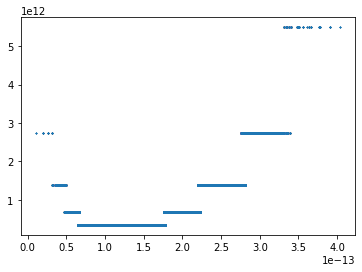

In [9]:
import matplotlib.pyplot as plt
AUcm = 1.49598e13 # AU in cm

r3d_radii = r3d_griddistances[:,0]

plt.plot(r3d_radius/AUcm,r3d_cellsizes,'.',markersize=1)


In [ ]:

r3d_darwindensity = np.interp(r3d_radii,radius_cm,r3d_gas_density)
